In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

In [2]:
# Dataset paths
first_set_path = r'F:/Image_Dataset/Dataset/First Set'
second_set_path = r'F:/Image_Dataset/Dataset/Second Set'

# Image categories
categories = ['Normal', 'OSCC']

In [3]:
def load_images_from_folder(folder_path, img_size=(224, 224)):
    images = []
    labels = []
    for category in categories:
        path = os.path.join(folder_path, category)
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = load_img(img_path, target_size=img_size)
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
            if category == 'Normal':
                labels.append(0) 
            else:
                labels.append(1)
    return np.array(images), np.array(labels)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define an ImageDataGenerator with augmentation

# datagen = ImageDataGenerator(
#     rescale=1.0/255.0,   # Normalize pixel values
#     rotation_range=20,   # Randomly rotate images
#     width_shift_range=0.2,  # Randomly shift images horizontally
#     height_shift_range=0.2,  # Randomly shift images vertically
#     shear_range=0.15,    # Shear transformation
#     zoom_range=0.2,      # Random zoom
#     horizontal_flip=True,  # Flip images horizontally
#     fill_mode='nearest'  # Fill pixels that go out of bounds
# )


datagen = ImageDataGenerator(
    rotation_range=10,     # Reduce rotation range
    width_shift_range=0.1,  # Reduce shift
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)


In [5]:
# Load 100x images
x_100x, y_100x = load_images_from_folder(first_set_path)

# Load 400x images
x_400x, y_400x = load_images_from_folder(second_set_path)

# Combine the datasets
x_data = np.concatenate((x_100x, x_400x), axis=0)
y_data = np.concatenate((y_100x, y_400x), axis=0)


# Shuffle the dataset
from sklearn.utils import shuffle
x_data, y_data = shuffle(x_data, y_data, random_state=42)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [7]:
# Augment the training set
train_datagen = datagen.flow(x_train, y_train, batch_size=16)

In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Compile the model
#model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
# Model summary
model.summary()

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train the model with augmented data
history = model.fit(train_datagen, validation_data=(x_test, y_test), epochs=15)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 15s 223ms/step - accuracy: 0.7647 - loss: 0.9019 - val_accuracy: 0.7623 - val_loss: 0.5892
Epoch 2/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 14s 224ms/step - accuracy: 0.7477 - loss: 0.6325 - val_accuracy: 0.7623 - val_loss: 0.5529
Epoch 3/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 14s 236ms/step - accuracy: 0.7580 - loss: 0.5713 - val_accuracy: 0.7623 - val_loss: 0.5465
Epoch 4/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 14s 231ms/step - accuracy: 0.7720 - loss: 0.5424 - val_accuracy: 0.7623 - val_loss: 0.5314
Epoch 5/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 14s 233ms/step - accuracy: 0.7652 - loss: 0.5497 - val_accuracy: 0.7623 - val_loss: 0.5591
Epoch 6/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 14s 232ms/step - accuracy: 0.7204 - loss: 0.6053 - val_accuracy: 0.7623 - val_loss: 0.5334
Epoch 7/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 14s 231ms/step - accuracy: 0.7572 - loss: 0.5423 - val_accuracy: 0.7623 - val_loss: 0.5267
Epoch 8/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 14s 233ms/step - accuracy: 0.7668 - loss: 0.5462 - val_accu

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step


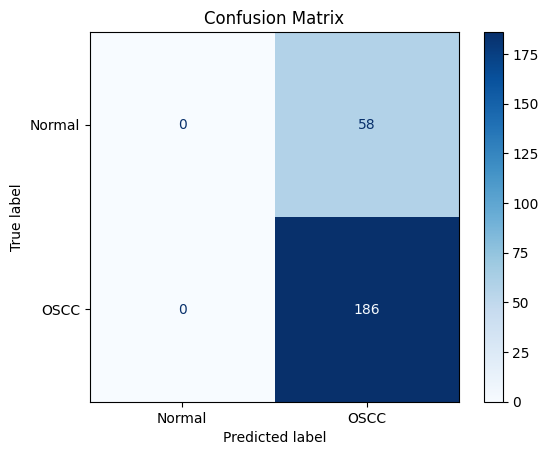

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Get model predictions
y_pred_prob = model.predict(x_test)  # Probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "OSCC"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [20]:
print(cm)

[[  0  58]
 [  0 186]]


In [12]:
#history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

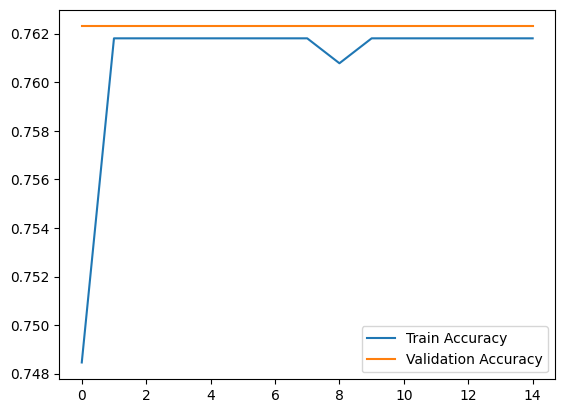

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.7692 - loss: 0.5362
Test Accuracy: 76.23%


In [13]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

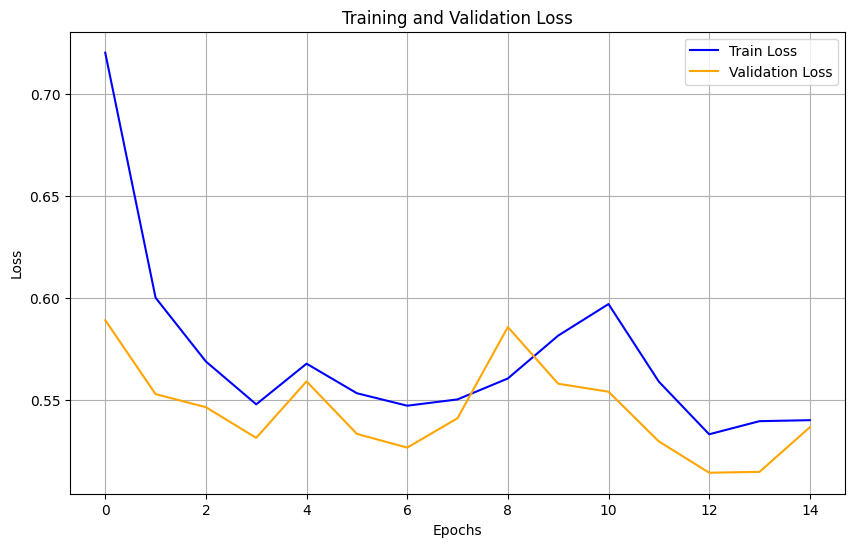

In [14]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
model.save("basicCNN_model.keras")

In [16]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("basicCNN_model.keras")

# Print the model summary to verify
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,507,269 (127.82 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,338,180 (85.21 MB)

In [17]:
def predict_image(image_path, model):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    prediction = model.predict(img_array)
    print(prediction[0])
    if prediction[0] > 0.5:
        print("Prediction: OSCC")
    else:
        print("Prediction: Normal")
        
# predict_image(r'F:/Image_Dataset/Dataset/First Set/Normal/Normal_100x_1.jpg', model)

predict_image(r'OSCC_100x_54.jpg', model)
predict_image(r'OSCC_100x_75.jpg', model)
predict_image(r'OSCC_100x_98.jpg', model)
predict_image(r'OSCC_100x_105.jpg', model)
predict_image(r'OSCC_100x_112.jpg', model)
predict_image(r'OSCC_100x_169.jpg', model)

# predict_image(r'F:/Image_Dataset/Dataset/Second Set/Normal/Normal_400x_1.jpg', model)
# predict_image(r'F:/Image_Dataset/Dataset/Second Set/OSCC/OSCC_400x_23.jpg', model)     
        

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[0.82330024]
Prediction: OSCC
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[0.7157542]
Prediction: OSCC
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[0.76400155]
Prediction: OSCC
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[0.86268896]
Prediction: OSCC
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[0.781464]
Prediction: OSCC
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[0.83975875]
Prediction: OSCC


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step


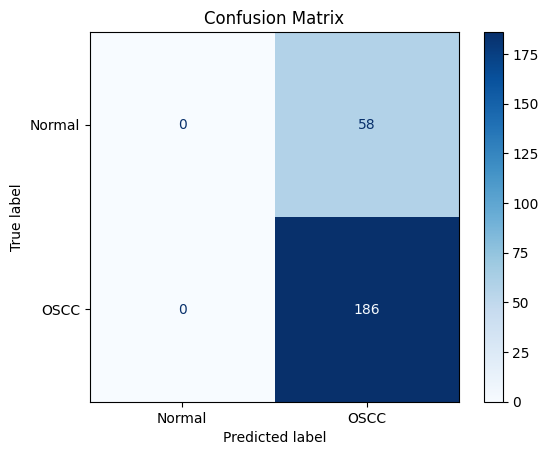

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Get model predictions
y_pred_prob = model.predict(x_test)  # Probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary predictions

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "OSCC"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

